In [64]:
# 파일 로드
import pandas as pd
file_name = 'titanic_train.csv'
file_path = './data/'
titanic_data = pd.read_csv(file_path+file_name, index_col='PassengerId', header=0, sep=',')

# 실습 3_2 (타이타닉 생존자체크)
#### 1. 30대 이면서 1등석에 탄 사람수.
#### 2. 클래스(Pclass)별 나이 평균
#### 3. 클래스(Pclass)와 성별에 따른 생존률
#### 4. 나이(Age)대 별 생존율 구하기

In [66]:
def age_process(n):
    if n >= 70:
        return '노인'
    elif n >= 60:
        return '60대'
    elif n >= 50:
        return '50대'
    elif n >= 40:
        return '40대'
    elif n >= 30:
        return '30대'
    elif n >= 20:
        return '20대'
    elif n >= 10:
        return '10대'
    else :
        return '유아'
    
titanic_data['Age_Range'] = titanic_data['Age'].apply(age_process)
print(titanic_data.groupby('Age_Range').sum()['Survived'])

Age_Range
10대    41
20대    77
30대    73
40대    34
50대    20
60대     6
노인      1
유아     90
Name: Survived, dtype: int64


In [67]:
# 1.

def test4(n):
    count_n = 0
    if n == '30대':
        count_n += 1
    return count_n

print(titanic_data[titanic_data['Pclass']==1]['Age_Range'].apply(test4).sum())
print()

print(titanic_data[titanic_data['Pclass']==1][titanic_data['Age_Range']=='30대'].count()['Age_Range'])
print()

answer=[i for i in titanic_data[titanic_data['Pclass']==1].index if titanic_data['Age_Range'].loc[i] == '30대']
print(len(answer))


50

50

50


C:\Users\minch\anaconda3\envs\abangues\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [71]:
titanic_data[(titanic_data['Pclass'] == 1) & (titanic_data['Age_Range'] == '30대')].count()

Survived     50
Pclass       50
Name         50
Sex          50
Age          50
SibSp        50
Parch        50
Ticket       50
Fare         50
Cabin        43
Embarked     49
Age_Range    50
dtype: int64

In [5]:
# 2.
def test5(n):
    print(n['Age'].mean())

titanic_data.groupby('Pclass').apply(test5)
print(titanic_data.groupby('Pclass').mean()['Age'])

38.233440860215055
29.87763005780347
25.14061971830986
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [6]:
# 3. 
def test(n):
    return((n['Survived'][n['Survived']==1].count())/(n['Survived'].count()))
print(titanic_data.groupby(['Pclass','Sex']).apply(test))

print(titanic_data.groupby(['Pclass','Sex']).mean()['Survived'])

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [77]:
#### 4.
def test2(n):
    if (n // 10) > 0:
        return '{0}'.format(int(10*(n // 10)))
    elif n == -1:
        return '-1'
    else :
        return '0'
    
def test3(n):
    return((n['Survived'][n['Survived']==1].count())/(n['Survived'].count()))

# 파일 로드
file_name = 'titanic_train.csv'
file_path = './data/'
titanic_data = pd.read_csv(file_path+file_name, index_col='PassengerId', header=0, sep=',')
titanic_data['Age'] = titanic_data['Age'].fillna(-1)

titanic_data['New_Age_Range'] = titanic_data['Age'].apply(test2)
print(titanic_data.groupby('New_Age_Range').apply(test3))
print(titanic_data.groupby('New_Age_Range').mean()['Survived'])

New_Age_Range
-1    0.293785
0     0.612903
10    0.401961
20    0.350000
30    0.437126
40    0.382022
50    0.416667
60    0.315789
70    0.000000
80    1.000000
dtype: float64
New_Age_Range
-1    0.293785
0     0.612903
10    0.401961
20    0.350000
30    0.437126
40    0.382022
50    0.416667
60    0.315789
70    0.000000
80    1.000000
Name: Survived, dtype: float64


# 실습 01 (타이타닉 생존자체크)

In [78]:
def age_process(n):
    if n >= 70:
        return '노인'
    elif (n // 10) > 0:
        return '{0}대'.format(int(10*(n // 10)))
    else :
        return '유아'


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = 'titanic_train.csv'
file_path = './data/'
titanic_data = pd.read_csv(file_path+file_name, index_col='PassengerId', header=0, sep=',')

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Age_Range'] = titanic_data['Age'].apply(age_process)

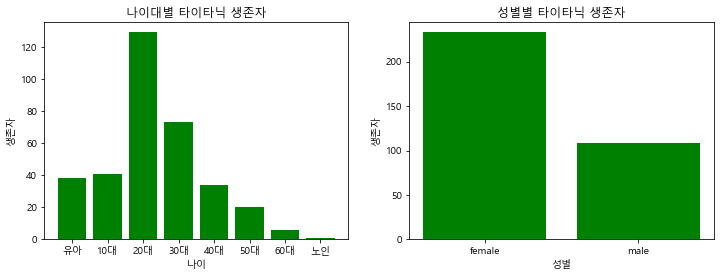

In [80]:


age_list=[i for i in range(-1, 8)]
x = [titanic_data.groupby('Age_Range').sum()['Survived'].index[i] for i in age_list]
y = [titanic_data.groupby('Age_Range').sum()['Survived'].values[i] for i in age_list]

plt.figure(figsize=(12,4)) # 그래프 전체 크기
grid = plt.GridSpec(1,2) # GirdSpec(행, 열)
plt.rc('font', family='Malgun Gothic') 

plt.subplot(grid[0,0])
plt.bar(x, y, color ='g')
plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')

plt.subplot(grid[0,1])
plt.bar(titanic_data.groupby('Sex').sum()['Survived'].index, titanic_data.groupby('Sex').sum()['Survived'].values, color ='g')
plt.rc('font', family='Malgun Gothic') 
plt.title('성별별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')

plt.show()

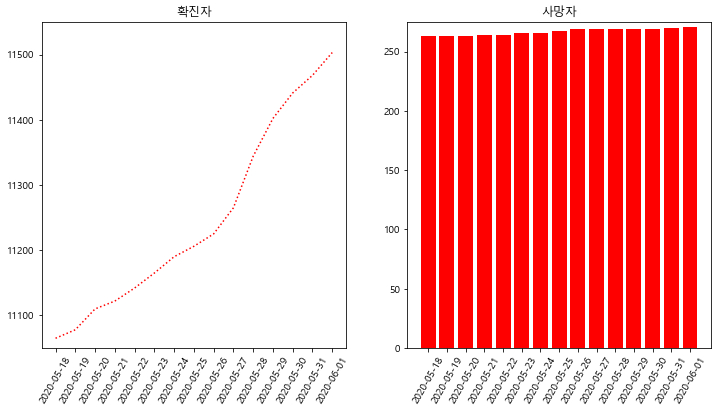

In [82]:

daily_data = pd.read_csv('./data/kr_daily.csv', index_col=False, header=0, sep=',')
x = [str(i)[:10] for i in pd.date_range(start='2020-05-18', end='2020-06-01')]
confirmed_list = daily_data[daily_data['date']>20200517]['confirmed']
death_list = daily_data[daily_data['date']>20200517]['death']

plt.figure(figsize=(12,6)) # 그래프 전체 크기
grid = plt.GridSpec(1,2) # GirdSpec(행, 열)
plt.rc('font', family='Malgun Gothic') 
x_text_rotation = 60

plt.subplot(grid[0,0])
plt.plot(x, confirmed_list, color='r', linestyle='dotted')
plt.xticks(rotation = x_text_rotation)
plt.ylim(11050,11550)
plt.title('확진자')

plt.subplot(grid[0,1:])
plt.bar(x, death_list, color ='r')
plt.xticks(rotation = x_text_rotation)
plt.ylim(0,275)
plt.title('사망자')

plt.show()


# 정규표현식 실습
해당 기사에서 네이버가 총 몇번 나오는지 정규표현식을 이용 파이썬에서 확인.

In [130]:
import re
text = """
전국 언론 노동자들이 시민사회단체와 함께 네이버의 지역 차별을 규탄하고 개선을 촉구하는 무기한 릴레이 시위에 돌입했다.

전국언론노조와 전국 민주언론시민연합(민언련)은 1일 오전 11시 30분 경기도 성남시의 네이버 본사(그린팩토리) 앞에서 1인 시위를 시작했다. 이날 시위에는 오정훈 전국언론노동조합위원장, 전대식 지역신문노동조합협의회 의장(부산일보 지부장), 김명래 경인일보지부장, 민진영 경기민주언론시민연합 사무처장 등이 참여했다.

이들은 1인 시위를 통해 ‘네이버 뉴스 서비스 지역 언론 배제 개선’을 요구하고 ‘지역 공론장 형성을 위한 네이버의 공적 책임’을 촉구했다. 전국언론노조와 민언련은 매주 월요일마다 네이버 본사 앞 시위를 진행할 예정이다.

네이버는 최근 뉴스 서비스에 인공지능 에어스(AiRS) 알고리즘을 적용하는 방식으로 뉴스 편집 기능을 개편했다. 이후 지역 언론사 뉴스의 노출이 현격하게 줄어들었다. 아울러 100여 개 모바일 콘텐츠 제휴 언론사 중 독자가 구독을 선택할 수 있는 ‘채널’ 제휴사 44곳을 선정했는데 이 과정에서 지역 언론을 철저하게 배제했다. 이에 반발해 전국언론노조뿐 아니라 한국지방신문협회, 대한민국지방신문협의회 등 지역 신문 단체도 공동 성명을 발표하며 개선을 요구하고 나섰다. 전국시도의회의장협의회는 최근 총회에서 ‘네이버 지역 언론 배제 반대 성명’을 채택하기도 했다. 하지만 이 같은 반발에도 네이버는 뚜렷한 해결책을 내지 않고 있다.

오정훈 위원장은 1인 시위에서 “네이버는 해결책을 내놓기는커녕 뉴스제휴평가위원회에만 책임을 떠넘기고 있다”며 “지역 언론 배제 문제의 해결을 위한 대화 요구에 즉각 응답해 뉴스 유통사업자로서의 사회적 역할을 수행해야 한다”고 촉구했다.

전대식 의장은 “2005년 당시 네이버는 모든 언론사에 뉴스 유통망을 제공하는 우군이었지만 15년 만에 갑질하고 횡포하는 기업으로 전락했다”며 “지역 언론 종사자들이 만든 콘텐츠가 네이버에서 사라진 현실을 놓고 대화하고 상생적으로 풀어야 한다”면서 협의 창구 개설을 요구했다.

민언련은 국내 1위 포털 네이버가 지역 공론장을 만드는 사회적 책임을 외면하는 것은 현 정부의 지방분권 강화 정책에 위배되는 것이라고 지적했다.

민진영 사무처장은 “네이버가 지역신문에 대한 보도를 배제하고 시민들과의 소통 창구를 차단하는 것은 현 정부 정책인 지방분권 강화, 민주주의 정착이라는 큰 의제를 거역하는 것”이라며 “이런 행태는 반드시 중단돼야 하고 다양한 소식들이 소비자와 시민에게 전달돼야 한다”고 강조했다.

출처 : 제주新보(http://www.jejunews.com)"
"""

In [131]:
print(len(re.findall('네이버', text)))

13


# 정규표현식


In [139]:
# 표현식 []
text = "i like orange! 200$ i like orange! 200$"
print(re.findall('[orn]', text))
print(re.findall('[orn][oan].', text)) #[orn]이 하나의 글자를 표현, '.' 도 하나의 글자 표현

['o', 'r', 'n', 'o', 'r', 'n']
['ran', 'ran']


In [142]:
#[0-9]의 형식으로 숫자줄수 있다.[0,1,2...,9]
print(re.findall('[0-9]', text))
#[A-Za-z]로 전체 알파벳도 가능
print(re.findall('[A-Za-z]', text))
# 한글은 [가-힣]가 전체범위

['2', '0', '0', '2', '0', '0']
['i', 'l', 'i', 'k', 'e', 'o', 'r', 'a', 'n', 'g', 'e', 'i', 'l', 'i', 'k', 'e', 'o', 'r', 'a', 'n', 'g', 'e']


In [143]:
#[^A-Za-z]는 영문자가 아닌것만 선택하도록 한다 ^가 NOT로 쓰인것.
print(re.findall('[^A-Za-z]', text))

[' ', ' ', '!', ' ', '2', '0', '0', '$', ' ', ' ', ' ', '!', ' ', '2', '0', '0', '$']


In [147]:
# ()를 이용해 그룹(캡켜)로 활용할수있다.
print(re.findall('(orange|i)', text)) #'|'(or)조건을 줄 수 있다.

['i', 'i', 'orange', 'i', 'i', 'orange']


In [152]:
test_text = '내 전화번호는 010-0029-9782 입니다.'
result = re.search("([0-9][0-9][0-9])-([0-9][0-9][0-9][0-9])-([0-9][0-9][0-9][0-9])", test_text)

In [157]:
print(result.group(0))
print(result.group(1))
print(result.group(2))
print(result.group(3))

010-0029-9782
010
0029
9782


In [160]:
re.findall('[^ ]+',test_text) #띄어쓰기 제외.

['내', '전화번호는', '010-0029-9782', '입니다.']

In [166]:
# .{5}은 5글자씩 끊어서
print(re.findall('.{5}',text))
print(re.findall('[abc]{3}', 'abcc abc ab bab abccabcab'))


['i lik', 'e ora', 'nge! ', '200$ ', 'i lik', 'e ora', 'nge! ']
['abc', 'abc', 'bab', 'abc', 'cab', 'cab']


In [172]:
text = "i like orange 200$ i like oange! 200$"
print(re.findall('oran(?=ge!)',text)) # 긍정형 전방탐색
print(re.findall('(?<=ora)nge',text)) # 긍정형 후방탐색

[]
['nge']


In [173]:
print(re.findall('oran(?!ge!)',text)) # 긍정형 전방탐색
print(re.findall('(?<!ora)nge',text)) # 긍정형 후방탐색

['oran']
['nge']


# 파이썬에서 전화번호 찾기

In [175]:
phone_n = """
010-2334-3234
02-302-3033
010-1321-4043
02-01-32
33-3303-3033
016-444-3042
"""

In [183]:
results = re.findall("[0-9]{3}-[0-9]{3,4}-[0-9]{4}", phone_n)
results2 = re.findall("\d{3}-\d{3,4}-\d{4}", phone_n)
for i in results2:
    print(i)

010-2334-3234
010-1321-4043
016-444-3042


In [188]:
results = re.findall("[0-9]{3}-[0-9]{3,4}-[0-9]{4}", phone_n)
results2 = re.findall("(\d{3})-(\d{3,4})-(\d{4})", phone_n)
for i in results2:
    print(i)

('010', '2334', '3234')
('010', '1321', '4043')
('016', '444', '3042')


In [186]:
results = re.finditer("[0-9]{3}-[0-9]{3,4}-[0-9]{4}", phone_n)
results2 = re.finditer("(\d{3})-(\d{3,4})-(\d{4})", phone_n)
for i in results2:
    print(i.group())

010-2334-3234
010-1321-4043
016-444-3042


## 파이썬에서 필요없는 부분제거
re.sub(정규식, 치환할 문자, 대상문자)

In [189]:
ex1 = """
[앵커]

바로 좀 팩트체크를 해 보겠습니다. 제모를 하면 마약검사에서 빠져나갈 수 있다. 연예인 마약사건과 맞물려서 이런 글들이 온라인에서 확산됐습니다. 수사기법을 비웃는 듯한 내용입니다. 팩트체크팀이 국립과학수사연구원의 도움을 받아서 확인을 했습니다. 결론은 마약 성분은 체모 외에도 온몸을 흔적을 남긴다는 겁니다.
오대영 기자 나와 있습니다. 구체적으로 어떤 글들이 퍼져 있습니까?

[기자]

전신 제모를 하면 문제가 없다. 염색, 탈색을 하면 된다. 눈썹은 검사해도 소용없다 등의 내용입니다.
포털사이트에서 마약 검사라고 검색을 하면 모발 검사 안 걸리는 법이라는 연관 검색어까지 뜹니다.
"""

In [198]:
results = re.sub("[\[.+\]]", "", ex1)
print(results)



앵커

바로 좀 팩트체크를 해 보겠습니다 제모를 하면 마약검사에서 빠져나갈 수 있다 연예인 마약사건과 맞물려서 이런 글들이 온라인에서 확산됐습니다 수사기법을 비웃는 듯한 내용입니다 팩트체크팀이 국립과학수사연구원의 도움을 받아서 확인을 했습니다 결론은 마약 성분은 체모 외에도 온몸을 흔적을 남긴다는 겁니다
오대영 기자 나와 있습니다 구체적으로 어떤 글들이 퍼져 있습니까?

기자

전신 제모를 하면 문제가 없다 염색, 탈색을 하면 된다 눈썹은 검사해도 소용없다 등의 내용입니다
포털사이트에서 마약 검사라고 검색을 하면 모발 검사 안 걸리는 법이라는 연관 검색어까지 뜹니다



In [201]:
text = 'apple, orange! banana pineapple'
result = re.split("[,! ]", text)
print(result)

['apple', '', 'orange', '', 'banana', 'pineapple']


In [206]:
text = '<html><head><title>Title</title>'
result = re.search("<.+>", text)
result.group()

'<html><head><title>Title</title>'

In [204]:
text = '<html><head><title>Title</title>'
result = re.search("<.+?>", text)
result.group()

'<html>'

In [205]:
text = '<html><head><title>Title</title>'
result = re.findall("<(.+?)>", text)
result

['html', 'head', 'title', '/title']

# 실습 01 정상적인 이메일만 출력.

In [353]:
text = """
jkilee@gmail.com
kttredef@naver.com
akdef!aa.com
adekik@best.kr
abkereff@aacde
adefgree@korea.co.kr
"""

In [354]:
result = re.findall("\w+@\w+\.\w+\.*\w*", text)
print(result)

['jkilee@gmail.com', 'kttredef@naver.com', 'adekik@best.kr', 'adefgree@korea.co.kr']


# 실습 02
텍스트 중에 <내용>괄호로 뭈여진 텍스트를 괄호 포함 모두 제거

In [364]:
text = """
안녕하세요 저는 <em>홍길동</em> 입니다. 나이는 24살 세계 최고의 <a href="aa.aa.com">데이터 분석가</a>가 되고싶습니다.
"""

In [365]:
result =  re.sub("<.+?>", "", text)
print(result)


안녕하세요 저는 홍길동 입니다. 나이는 24살 세계 최고의 데이터 분석가가 되고싶습니다.



In [366]:
result =  re.sub("<[^<].+?>", "", text)
print(result)


안녕하세요 저는 홍길동 입니다. 나이는 24살 세계 최고의 데이터 분석가가 되고싶습니다.



# 실습 3
1. 정규표현식을 이용 <span>내용</span> 을 각각 추출
2. 추출된 항목에서 <span>과 </span> 태그를 모두제거
3. 각각 총 3개의 항목을 리스트에 넣기

심화 : 위의 1, 2 과정을 하나의 정규식으로 해결해보세요

In [376]:
text = """
<p>
<span>네이버가 뉴스 서비스에 인공지능(AI)을 도입해 페이지 뷰(PV)를 늘리고 이용자를 끌어 모으고 있다.</span>
<span>네이버는 5일 오전 서울 강남구 그랜드 인터컨티넨털 호텔에서 AI 콜로키움 2019를 열고 이 같은 AI 성과와 전략을 소개했다.</span>
<span>이날 기조연설에서 김광현 네이버 서치앤클로바 리더는 "AI 뉴스 추천 시스템인 에어스(AiRS)를 도입하면서 뉴스 소비량이 확대되고 있다" 고 말했다.</span>
</p>
"""

In [373]:
result = [i for i in re.split("\n*<.+?>\n*", text) if i != '']
print(result)

['네이버가 뉴스 서비스에 인공지능(AI)을 도입해 페이지 뷰(PV)를 늘리고 이용자를 끌어 모으고 있다.', '네이버는 5일 오전 서울 강남구 그랜드 인터컨티넨털 호텔에서 AI 콜로키움 2019를 열고 이 같은 AI 성과와 전략을 소개했다.', '이날 기조연설에서 김광현 네이버 서치앤클로바 리더는 "AI 뉴스 추천 시스템인 에어스(AiRS)를 도입하면서 뉴스 소비량이 확대되고 있다" 고 말했다.']


In [377]:
sentences = re.findall("<span>(.+)</span>", text)
print(sentences)

['네이버가 뉴스 서비스에 인공지능(AI)을 도입해 페이지 뷰(PV)를 늘리고 이용자를 끌어 모으고 있다.', '네이버는 5일 오전 서울 강남구 그랜드 인터컨티넨털 호텔에서 AI 콜로키움 2019를 열고 이 같은 AI 성과와 전략을 소개했다.', '이날 기조연설에서 김광현 네이버 서치앤클로바 리더는 "AI 뉴스 추천 시스템인 에어스(AiRS)를 도입하면서 뉴스 소비량이 확대되고 있다" 고 말했다.']


In [379]:
sentences = re.findall("(?<=<span>).*(?=</span)", text)
print(sentences)

['네이버가 뉴스 서비스에 인공지능(AI)을 도입해 페이지 뷰(PV)를 늘리고 이용자를 끌어 모으고 있다.', '네이버는 5일 오전 서울 강남구 그랜드 인터컨티넨털 호텔에서 AI 콜로키움 2019를 열고 이 같은 AI 성과와 전략을 소개했다.', '이날 기조연설에서 김광현 네이버 서치앤클로바 리더는 "AI 뉴스 추천 시스템인 에어스(AiRS)를 도입하면서 뉴스 소비량이 확대되고 있다" 고 말했다.']
